<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E1-SentimentPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

**Estudiantes:**
- Mili Galindo
- Anguie Garcia
- Sonia Ramirez
- Lourdes Rodil


## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline.
Twitter data was scraped from February of 2015 and contributors were
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

## **Stage 1 - Adquisión de datos & EDA**

Los datos para el desarrollo del ejecicio fueron obtenidos del Github de la asignatura:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Se observa que la data set cuenta con 14.640 registros y 14 columnas:

In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: >

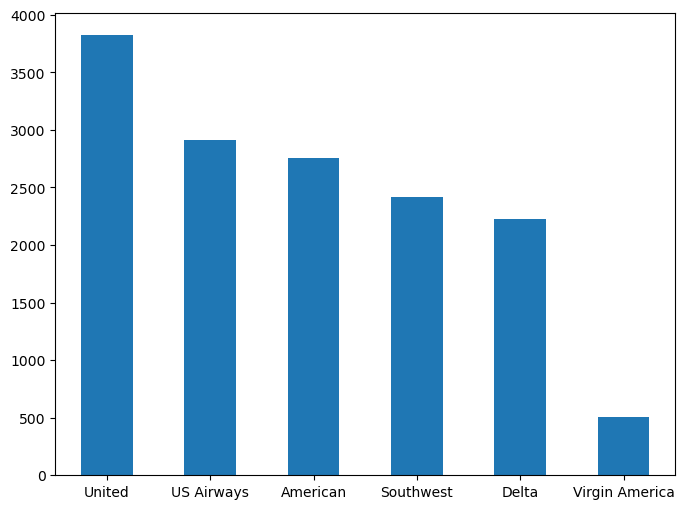

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

<Axes: title={'center': 'Sentiment by airline'}, xlabel='airline'>

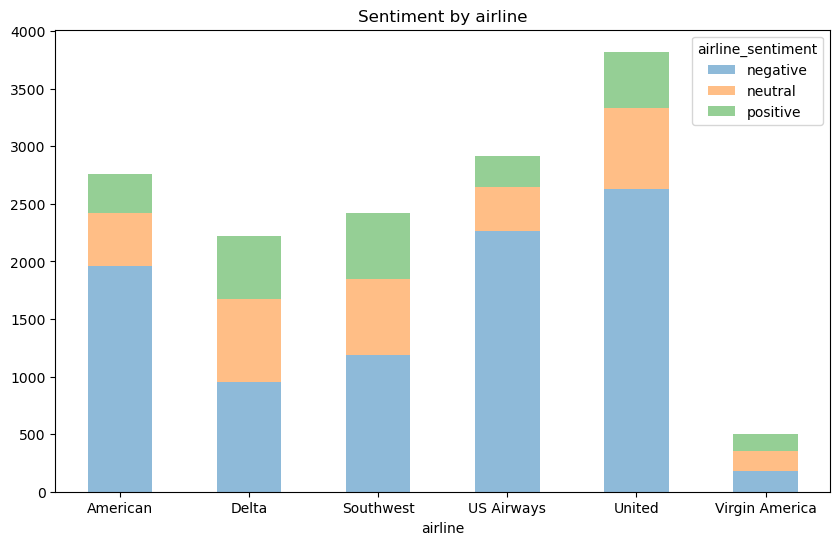

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

## **Stage 2 - Limpieza de los datos**

### a. Identificación de registros Nulos
Se confirma que no existen valores nulos.

In [7]:
tweets['text'].isnull().sum()

0

## **Stage 3 - Modelación**

# **Exercise 1.1**

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

El codigo para crear "Y" asigna valores numéricos a los diferentes sentimientos expresados en la columna 'airline_sentiment', lo cual es útil para el análisis posterior donde se requieran valores numéricos en lugar de etiquetas de texto para los sentimientos:

In [9]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

Se confirma el tamaño de los dataset "x" y "y" para inicial el analisis.

In [10]:
y.shape

(14640,)

In [11]:
X.shape

(14640,)

### **Modelación**
Se genera el modelo de clasificacion usuando **"CountVectorizer"** y **"RandomForestClassifier"**. Para ello se utiliza se divide el dataset tomando como testing un **30%** del datasert, parametros por defecto en el modelo "random forest" excepto por una semilla de 83.

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Se convertierte el texto en características numéricas usando CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Se entrena el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=83)
rf_classifier.fit(X_train_vect, y_train)

# Se realiza la predeción el sentimiento en el conjunto de prueba
y_pred = rf_classifier.predict(X_test_vect)

# Se calcula la precisión de la predicción
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Se genera el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7581967213114754
Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      2749
     neutral       0.68      0.38      0.49       921
    positive       0.81      0.46      0.59       722

    accuracy                           0.76      4392
   macro avg       0.75      0.60      0.64      4392
weighted avg       0.75      0.76      0.73      4392



Finalmente se genera un mapa de confusion para analizar visualmente por etiqueta los resultados de la predicción:

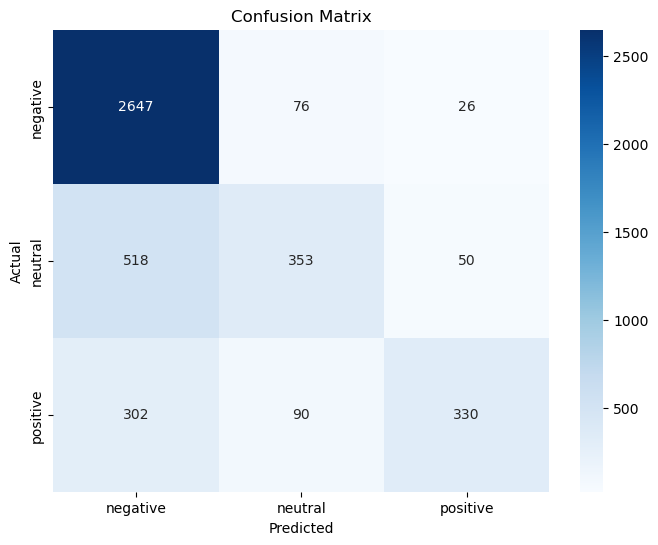

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### **Conclusion- Exercise 1.1:**
El acuracy de este modelo es **0.7581** es positivo si consideramos que se realizo preprocesamiento al data ser inicial, por tanto se espera que para los siguiente el ejercio mejore.

# **Exercise 1.2**

Remove stopwords, then predict the sentiment using CountVectorizer. use Random Forest classifier

Se realizaron dos ejercicios para evaluar la diferencia en el desempeño:

a. Realizar preprocesamiento antes y luego usar el "CountVectorizer"

b. Incluir en "CountVectorizer" el parametro de stopwords 

### **a. Realizar preprocesamiento antes y luego usar el "CountVectorizer"**

Se realizo un preprocesamiento para eliminar stopwords:

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar la lista de stopwords si aún no lo has hecho
nltk.download('stopwords')
nltk.download('punkt')

# Definir una función para eliminar stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Puedes cambiar 'english' por otro idioma si es necesario
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Crea una nueva columna llamada 'clean_text' que contiene los textos sin stopwords
tweets['clean_text'] = tweets['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### **Modelación**
Se genera el modelo de clasificacion usuando **"CountVectorizer"** y **"RandomForestClassifier"**. Para ello se utiliza se divide el dataset tomando como testing un **30%** del datasert, parametros por defecto en el modelo "random forest" excepto por una semilla  de 83.

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(tweets['clean_text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Se convertierte el texto en características numéricas usando CountVectorizer
vectorizer = CountVectorizer()
X_train2_vect = vectorizer.fit_transform(X_train2)
X_test2_vect = vectorizer.transform(X_test2)

# Se entrena el clasificador Random Forest
rf_classifier2 = RandomForestClassifier(random_state=83)
rf_classifier2.fit(X_train2_vect, y_train2)

# Se realiza la predeción el sentimiento en el conjunto de prueba
y_pred2 = rf_classifier2.predict(X_test2_vect)

# Se calcula la precisión de la predicción
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

# Se genera el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

Accuracy: 0.7527322404371585
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85      2749
     neutral       0.60      0.42      0.50       921
    positive       0.73      0.56      0.63       722

    accuracy                           0.75      4392
   macro avg       0.71      0.63      0.66      4392
weighted avg       0.74      0.75      0.74      4392



**Conclusion:** El resultado del modelo genera un accuracy de **0.7527** que es menor al generado en el **ejercicio 1.1 - Accuracy: 0.7581**  donde no se eliminaron las stopwords. 

### **b. Incluir en "CountVectorizer" el parametro de stopwords**

Se genera el modelo de clasificacion usuando **"CountVectorizer"** donde se incluye como pararamentro la eliminacion de stopwords del ingles y **"RandomForestClassifier"**.

 Para ello se utiliza se divide el dataset tomando como testing un **30%** del datasert, parametros por defecto en el modelo "random forest" excepto por una semilla de 83.

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Se convertierte el texto en características numéricas usando CountVectorizer
vectorizer3 = CountVectorizer(stop_words='english')
X_train3_vect = vectorizer3.fit_transform(X_train3)
X_test3_vect = vectorizer3.transform(X_test3)

# Se entrena el clasificador Random Forest
rf_classifier3 = RandomForestClassifier(random_state=83)
rf_classifier3.fit(X_train3_vect, y_train3)

# Se realiza la predeción el sentimiento en el conjunto de prueba
y_pred3 = rf_classifier3.predict(X_test3_vect)

# Se calcula la precisión de la predicción
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

# Se genera el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test3, y_pred3))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.89      0.84      2749
     neutral       0.57      0.47      0.51       921
    positive       0.70      0.58      0.63       722

    accuracy                           0.75      4392
   macro avg       0.69      0.65      0.66      4392
weighted avg       0.74      0.75      0.74      4392



**Conclusion:** El resultado del modelo genera un accuracy de 0.75 que es aun menor al generado en el **ejercicio 1.1 - Accuracy: 0.7581**  donde no se eliminaron las stopwords. 

Finalmente se genera un mapa de confusion para analizar visualmente por etiqueta los resultados de la predicción **a. Realizar preprocesamiento antes y luego usar el "CountVectorizer"**

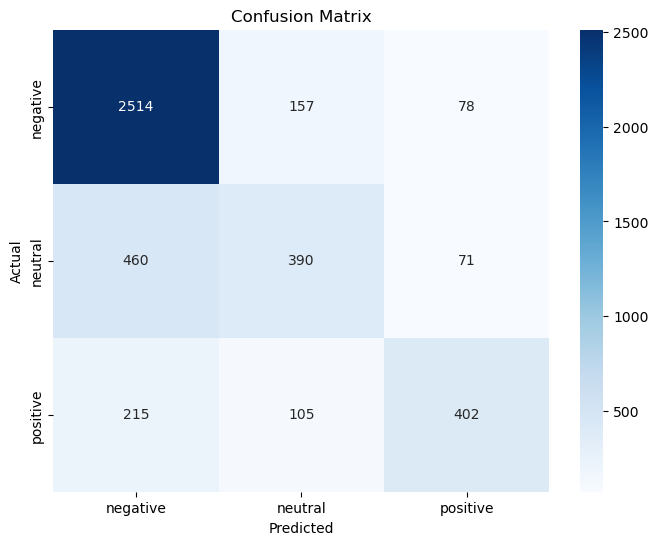

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test2, y_pred2)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Conclusion- Exercise 1.2:**

Considerando que el accuracy del ejercicio #1.1 sin eliminar stopwords fue **0.7581**. La eliminacion de stopwords para este dataset no mejoro el acuracy.

No obstante, de ser necesario es mejor utilizar un preprocesamiento con "nltk.corpus - stopwords" donde el accuracy fue **0.7527** en constrate con la eliminacion de stopwords como parametro de CountVectorizer donde el accurancy disminuyo aún mas a **0.75**.

# **Exercise 1.3**

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

### **a. Modelo ajustando el tamaño de n_grams y sin Stopwords**

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train4, X_test4, y_train4, y_test4 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Se convertierte el texto en características numéricas usando CountVectorizer
vectorizer4 = CountVectorizer(ngram_range=(1, 2)) # Para tener unigramas y bigramas
X_train4_vect = vectorizer4.fit_transform(X_train)
X_test4_vect = vectorizer4.transform(X_test4)

# Se entrena el clasificador Random Forest
rf_classifier4 = RandomForestClassifier(random_state=83)
rf_classifier4.fit(X_train4_vect, y_train4)

# Se realiza la predeción el sentimiento en el conjunto de prueba
y_pred4 = rf_classifier4.predict(X_test4_vect)

# Se calcula la precisión de la predicción
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy:", accuracy4)

# Se genera el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test4, y_pred4))

Accuracy: 0.7490892531876139
Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      2749
     neutral       0.67      0.35      0.46       921
    positive       0.83      0.43      0.57       722

    accuracy                           0.75      4392
   macro avg       0.75      0.58      0.63      4392
weighted avg       0.75      0.75      0.72      4392



**Conclusion:** El resultado del modelo genera un accuracy de **0.7490** que es menor al generado en el **ejercicio 1.1 - Accuracy: 0.7581** donde no se incluyo los n_gramas como modelo.

### **b. Modelo ajustando el tamaño de n_grams y con Stopwords**

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train5, X_test5, y_train5, y_test5 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Se convertierte el texto en características numéricas usando CountVectorizer
vectorizer5 = CountVectorizer(ngram_range=(1,2),stop_words='english') # Para tener unigramas y bigramas
X_train5_vect = vectorizer5.fit_transform(X_train5)
X_test5_vect = vectorizer5.transform(X_test5)

# Se entrena el clasificador Random Forest
rf_classifier5 = RandomForestClassifier(random_state=83)
rf_classifier5.fit(X_train5_vect, y_train5)

# Se realiza la predeción el sentimiento en el conjunto de prueba
y_pred5 = rf_classifier5.predict(X_test5_vect)

# Se calcula la precisión de la predicción
accuracy5 = accuracy_score(y_test5, y_pred5)
print("Accuracy:", accuracy5)

# Se genera el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test5, y_pred5))

Accuracy: 0.7538706739526412
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      2749
     neutral       0.59      0.42      0.49       921
    positive       0.75      0.55      0.63       722

    accuracy                           0.75      4392
   macro avg       0.71      0.63      0.66      4392
weighted avg       0.74      0.75      0.74      4392



**Conclusion:** El resultado del modelo genera un accuracy de **0.7538** que es menor al generado en el **ejercicio 1.1 - Accuracy: 0.7581** donde no se incluyo los n_gramas ni stopwords en el modelo pero es mayor al **ejercicio 1.2b - Accuracy: 0.75**  donde se eliminaron los stopword pero no se consideraron n_gramas en el modelo.

#### **Conclusion- Exercise 1.3:**

Considerando que el accuracy del ejercicio #1.1 sin eliminar stopwords fue **0.7581**. La eliminacion de stopwords e inclusion de n_gramas para este dataset no mejoro el acuracy de un modelo simple.

No obstante de ser necesario es mejor aplicar la eliminacion de stoptwords y enegramas donde el accuracy fue **0.7538** en constrate con solo considerar enegramas como parametro de CountVectorizer donde el accurancy disminuyo aún mas a **0.7490**.

# **Exercise 1.4**

Predict the sentiment using TfidfVectorizer. - use Random Forest classifier 

Se analizan 3 modelos:

a. Modelo con parametros por defecto en TfidfVectorizer

b. Modelo incluyendo parametro de stopwords en TfidfVectorizer

c. Modelo incluyendo parametro de n_gramas en TfidfVectorizer

d. Modelo incluyendo parametro de stopwords y n_gramas en TfidfVectorizer

### **a. Modelo con parametros por defecto en TfidfVectorizer**

Se genera el modelo de clasificacion usuando **"TfidfVectorizer"** con los pararamentro por defecto y como modelo  **"RandomForestClassifier"** con parametros por defecto en el modelo "random forest" excepto por una semilla de 83.

Para ello se utiliza se divide el dataset tomando como testing un **30%** del dataset.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train6, X_test6, y_train6, y_test6 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Paso 1: Vectorización de texto con TfidfVectorizer
vectorizer6 = TfidfVectorizer()
X_train_tfidf = vectorizer6.fit_transform(X_train6)
X_test_tfidf = vectorizer6.transform(X_test6)

# Paso 2: Entrenamiento del clasificador RandomForest
rf_classifier6 = RandomForestClassifier(random_state=83)
rf_classifier6.fit(X_train_tfidf, y_train6)

# Paso 3: Predicción en el conjunto de prueba
y_pred6 = rf_classifier6.predict(X_test_tfidf)

# Paso 4: Se calcula la precisión de la predicción
accuracy6 = accuracy_score(y_test6, y_pred6)
print("Accuracy:", accuracy6)

# Paso 5: Evaluar el rendimiento del modelo
print(classification_report(y_test6, y_pred6))

Accuracy: 0.7513661202185792
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      2749
     neutral       0.69      0.38      0.49       921
    positive       0.79      0.42      0.55       722

    accuracy                           0.75      4392
   macro avg       0.75      0.59      0.63      4392
weighted avg       0.75      0.75      0.72      4392



**Conclusion:** El resultado del modelo genera un accuracy de **0.7513** que es menor al generado en el **ejercicio 1.1 - mejor Accuracy: 0.7581** al utilizar CountVectorizer

### **b. Modelo incluyendo parametro de stopwords en TfidfVectorizer**

Se genera el modelo de clasificacion usuando **"TfidfVectorizer"** donde se incluye como pararamentro la eliminacion de stopwords del ingles y **"RandomForestClassifier"**con parametros por defecto en el modelo "random forest" excepto por una semilla de 83.

Para ello se utiliza se divide el dataset tomando como testing un **30%** del dataset.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train7, X_test7, y_train7, y_test7 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Paso 1: Vectorización de texto con TfidfVectorizer
vectorizer7 = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer7.fit_transform(X_train7)
X_test_tfidf = vectorizer7.transform(X_test7)

# Paso 2: Entrenamiento del clasificador RandomForest
rf_classifier7 = RandomForestClassifier(random_state=83)
rf_classifier7.fit(X_train_tfidf, y_train7)

# Paso 3: Predicción en el conjunto de prueba
y_pred7 = rf_classifier7.predict(X_test_tfidf)

# Paso 4: Se calcula la precisión de la predicción
accuracy7 = accuracy_score(y_test7, y_pred7)
print("Accuracy:", accuracy7)

# Paso 5: Evaluar el rendimiento del modelo
print(classification_report(y_test7, y_pred7))

Accuracy: 0.7563752276867031
              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      2749
     neutral       0.63      0.40      0.49       921
    positive       0.73      0.54      0.62       722

    accuracy                           0.76      4392
   macro avg       0.72      0.62      0.65      4392
weighted avg       0.74      0.76      0.74      4392



**Conclusion:** El resultado del modelo genera un accuracy de **0.7563** que es menor al generado en el **ejercicio 1.1 - mejor Accuracy: 0.7581** al utilizar CountVectorizer

### **c. Modelo incluyendo parametro de n_gramas en TfidfVectorizer**

Se genera el modelo de clasificacion usuando **"TfidfVectorizer"** donde se incluye como pararamentro de enegramas (1,2) y **"RandomForestClassifier"** con parametros por defecto en el modelo "random forest" excepto por una semilla de 83.

Para ello se utiliza se divide el dataset tomando como testing un **30%** del dataset.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train8, X_test8, y_train8, y_test8 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Paso 1: Vectorización de texto con TfidfVectorizer
vectorizer8 = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer8.fit_transform(X_train6)
X_test_tfidf = vectorizer8.transform(X_test6)

# Paso 2: Entrenamiento del clasificador RandomForest
rf_classifier8 = RandomForestClassifier(random_state=83)
rf_classifier8.fit(X_train_tfidf, y_train8)

# Paso 3: Predicción en el conjunto de prueba
y_pred8 = rf_classifier8.predict(X_test_tfidf)

# Paso 4: Se calcula la precisión de la predicción
accuracy8 = accuracy_score(y_test8, y_pred8)
print("Accuracy:", accuracy8)

# Paso 5: Evaluar el rendimiento del modelo
print(classification_report(y_test8, y_pred8))

Accuracy: 0.7609289617486339
              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      2749
     neutral       0.66      0.43      0.52       921
    positive       0.81      0.47      0.60       722

    accuracy                           0.76      4392
   macro avg       0.75      0.62      0.66      4392
weighted avg       0.76      0.76      0.74      4392



Finalmente se genera un mapa de confusion para analizar visualmente por etiqueta los resultados de la predicción del mejor modelo del numeral 1.4

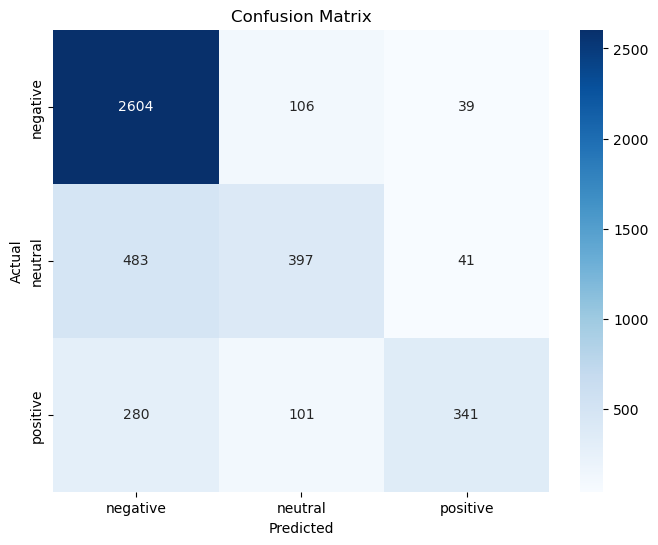

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test8, y_pred8)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Conclusion:** El resultado del modelo genera un accuracy de **0.7609** siendo mayor al generado en el **ejercicio 1.1 - mejor Accuracy: 0.7581** al utilizar "CountVectorizer" y  tiene mejor desempeño frente al modelo 1.4a. donde se utilizo "TfidfVectorizer" con parametros con defecto.


### **d. Modelo incluyendo parametro de stopwords y n_gramas en TfidfVectorizer**

Se genera el modelo de clasificacion usando **"TfidfVectorizer"** donde se incluye como pararamentro de enegramas (1,2) y con la eliminacion de stopwords del ingles. Adicionalmente, el modelo **"RandomForestClassifier"** con parametros por defecto en el modelo "random forest" excepto por una semilla de 83.

Para ello se utiliza se divide el dataset tomando como testing un **30%** del dataset.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train9, X_test9, y_train9, y_test9 = train_test_split(tweets['text'], tweets['airline_sentiment'], test_size=0.3, random_state=83)

# Paso 1: Vectorización de texto con TfidfVectorizer
vectorizer9 = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
X_train_tfidf = vectorizer9.fit_transform(X_train6)
X_test_tfidf = vectorizer9.transform(X_test6)

# Paso 2: Entrenamiento del clasificador RandomForest
rf_classifier9 = RandomForestClassifier(random_state=83)
rf_classifier9.fit(X_train_tfidf, y_train9)

# Paso 3: Predicción en el conjunto de prueba
y_pred9 = rf_classifier9.predict(X_test_tfidf)

# Paso 4: Se calcula la precisión de la predicción
accuracy9 = accuracy_score(y_test9, y_pred9)
print("Accuracy:", accuracy9)

# Paso 5: Evaluar el rendimiento del modelo
print(classification_report(y_test8, y_pred8))

Accuracy: 0.7572859744990893
              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      2749
     neutral       0.58      0.49      0.53       921
    positive       0.74      0.56      0.64       722

    accuracy                           0.76      4392
   macro avg       0.71      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392



**Conclusion:** El resultado del modelo genera un accuracy de **0.7573** que es menor al generado en el **ejercicio 1.1 - mejor Accuracy: 0.7581** al utilizar CountVectorizer.

Al comparar con los modelos de 1.4, se observa que tiene mejor desempeño frente al modelo 1.4a. donde se utilizo "TfidfVectorizer" con parametros con defecto pero menor desempeño frente al modelo 1.4b donde solo se utilizó enegramas (1,2)

#### **Conclusion- Exercise 1.4:**

Considerando que el mejor accuracy del ejercicio #1.1 fue **0.7581** utilizo "CountVectorizer", para este dataset se observa un mejor desempeño utilizar "TfidfVectorizer".

Enfoncandonos en el "TfidfVectorizer" como  herramienta de vectorización de texto, para este data set genero mejores resultados cuando se utilizaron enegramas (1,2) **Acuracy 0.7609** que cuando se utilizo solo stopwords **Acuracy 0.7563** o la combinacion de stopword y enegramas **Acuracy 0.7573**